<a href="https://colab.research.google.com/github/Saurabh-Hase/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Online Retail Customer Segmentation. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
# Importing Libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading data
df= pd.read_csv('/content/drive/MyDrive/Almabetter/Capstone Unsupervised Leaning Online Retail Customer Segmentation /Online Retail.csv', encoding= 'unicode_escape')

In [ ]:
# View first 5 rows of the dataset
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
# View last 5 rows of the dataset
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [ ]:
# Checking the shape
df.shape

(541909, 8)

In [ ]:
df.Description.value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [ ]:
# Column names
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
# View the description of the dataset
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


# **Data Preprocessing**

In [ ]:
# Check the missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# Checking how many Percentage of null value in customer
print(f'{round(df.CustomerID.isnull().sum()/df.shape[0] * 100,2)} %')

24.93 %


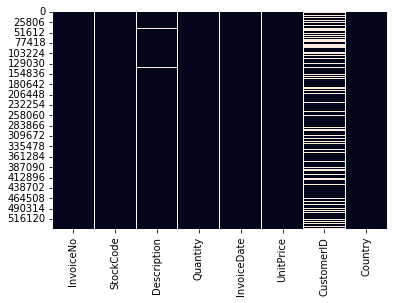

In [ ]:
# Plotting the null values on heatmap
sns.heatmap(df.isnull(), cbar = False)

In [ ]:
# Check duplicate values in our dataset
len(df[df.duplicated()])

5268

In [ ]:
# View the duplicate values in our dataset
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,01-12-2010 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,01-12-2010 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,01-12-2010 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,01-12-2010 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,01-12-2010 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,09-12-2011 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,09-12-2011 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,09-12-2011 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,09-12-2011 11:34,2.10,14446.0,United Kingdom


In [ ]:
# Dropping Duplicate Row
df = df.drop_duplicates()

In [ ]:
df.shape

(536641, 8)

In [ ]:
# Dropping values which has Unitprice less than or equal to 0
df=df[df.UnitPrice>0]

In [ ]:
# Dropping values which has Quantity less than or equal to 0
df=df[df.Quantity>0]

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,524878.000000,524878.000000,392692.000000
mean,10.616600,3.922573,15287.843865
std,156.280031,36.093028,1713.539549
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13955.000000
50%,4.000000,2.080000,15150.000000
75%,11.000000,4.130000,16791.000000
max,80995.000000,13541.330000,18287.000000


In [ ]:
# Dropping Null Values from Customer ID column
df2=df[df.CustomerID.notna()]

In [ ]:
df2.shape

(392692, 8)

In [ ]:
df2.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom


**Checking wheather there is any cancellation**

In [ ]:
# Lets check the InviceNo that starts with c
df2['InvoiceNo'] = df2['InvoiceNo'].astype('str')
df2[df2['InvoiceNo'].str.contains('C')]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [ ]:
df2 =df2[~df2['InvoiceNo'].str.contains('C')]
df2.shape

(392692, 8)

# Changing Invoice date column datatype

In [ ]:
# Changing Datatype of InvoiceDate
df2["InvoiceDate"] = pd.to_datetime(df2["InvoiceDate"])

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.0+ MB


In [ ]:
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df2.shape

(392692, 8)

# **EDA**

In [ ]:
# Lets check the unique id of the customer
df2['CustomerID'].nunique()

4338

In [ ]:
# Most frequent customers
frequent_customers = pd.DataFrame(df2['CustomerID'].value_counts().sort_values(ascending = False).reset_index())
frequent_customers.rename(columns = {'index':'CustomerID', 'CustomerID':'Count'},inplace = True)
frequent_customers

,CustomerID,Count
0,17841.0,7676
1,14911.0,5670
2,14096.0,5111
3,12748.0,4412
4,14606.0,2677
...,...,...
4333,17763.0,1
4334,15524.0,1
4335,17948.0,1
4336,14576.0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

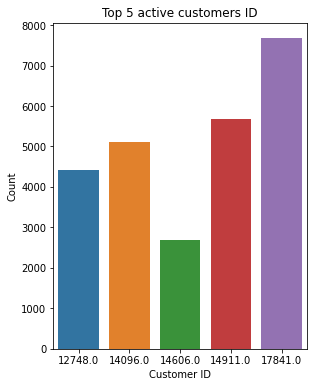

In [ ]:
# Plotting the top 5 customers
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.barplot(frequent_customers['CustomerID'][:5],frequent_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')

In [ ]:
# Analyze categorical features
categorical_columns = list(df2.select_dtypes(['object']).columns)
categorical_features = pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [ ]:
# Create a variable and check the description variable
Description_df = df2['Description'].value_counts().reset_index()
Description_df.rename(columns = {'index':'Description_Name', 'Description':'Count'},inplace = True)
Description_df.head()

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2016
1,REGENCY CAKESTAND 3 TIER,1713
2,JUMBO BAG RED RETROSPOT,1615
3,ASSORTED COLOUR BIRD ORNAMENT,1395
4,PARTY BUNTING,1389


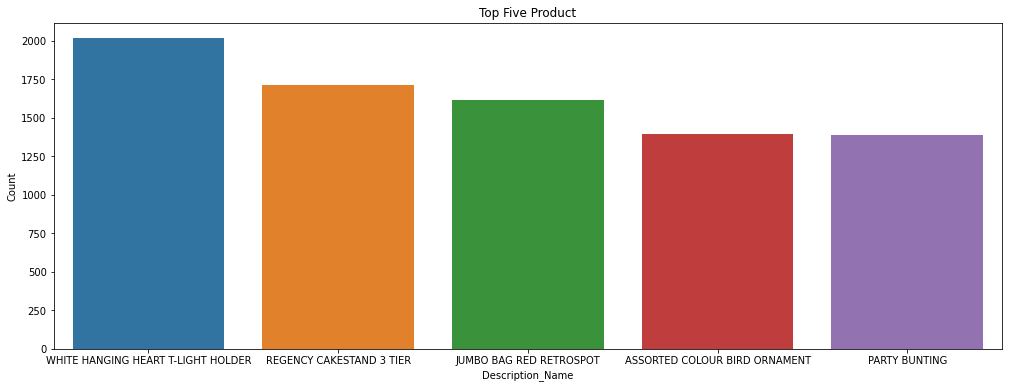

In [ ]:
# Plot the top 5 product
plt.figure(figsize=(17,6))
plt.title('Top Five Product')
sns.barplot(x='Description_Name', y='Count', data = Description_df.head(5))

In [ ]:
# Bottom 5 product
Description_df.tail()

,Description_Name,Count
3872,GREEN WITH METAL BAG CHARM,1
3873,WHITE WITH METAL BAG CHARM,1
3874,BLUE/NAT SHELL NECKLACE W PENDANT,1
3875,PINK EASTER HENS+FLOWER,1
3876,"PAPER CRAFT , LITTLE BIRDIE",1


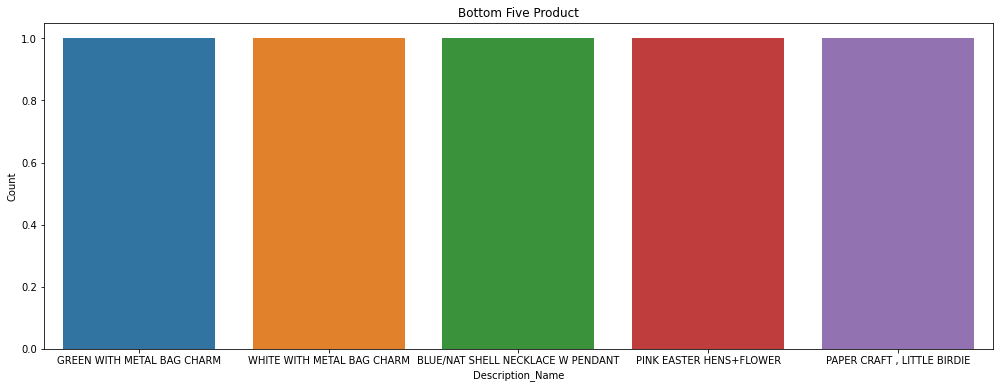

In [ ]:
# Plot the bottom 5 product
plt.figure(figsize=(17,6))
plt.title('Bottom Five Product')
sns.barplot(x='Description_Name', y='Count', data = Description_df.tail(5))

In [ ]:
# Create a variable and check the country variable and check top 5 countries
country_df = df2['Country'].value_counts().reset_index()
country_df.rename(columns = {'index':'Country_Name', 'Country':'Count'}, inplace = True)
country_df.head()

,Country_Name,Count
0,United Kingdom,349203
1,Germany,9025
2,France,8326
3,EIRE,7226
4,Spain,2479


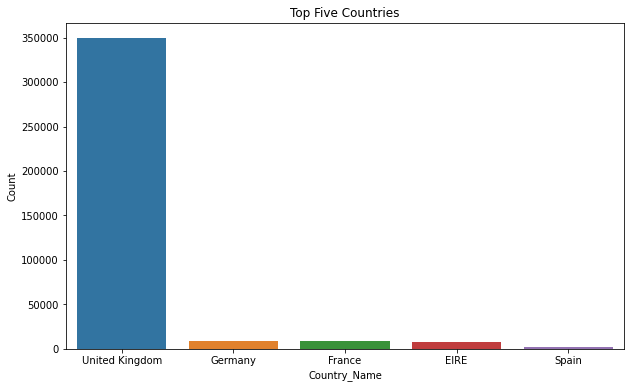

In [ ]:
# Plot the top 5 countries
plt.figure(figsize=(10,6))
plt.title('Top Five Countries')
sns.barplot(x='Country_Name', y='Count', data = country_df.head(5))

In [ ]:
# Bottom 5 countries
country_df.tail()

,Country_Name,Count
32,Lithuania,35
33,Brazil,32
34,Czech Republic,25
35,Bahrain,17
36,Saudi Arabia,9


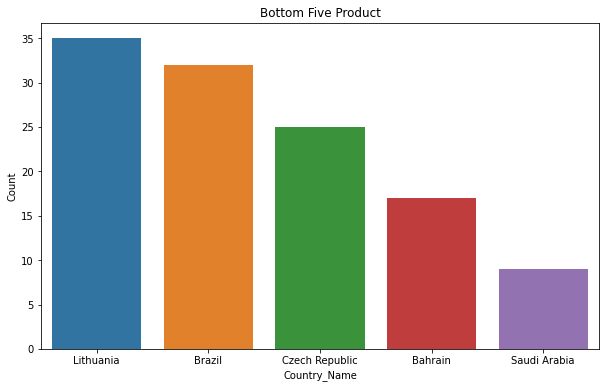

In [ ]:
# Plot bottom 5 countries
plt.figure(figsize=(10,6))
plt.title('Bottom Five Product')
sns.barplot(x='Country_Name', y='Count', data = country_df.tail(5))

In [ ]:
# Assigning numerical columns to variables
numerical_columns = list(df2.select_dtypes(['int64','float64']).columns)
numerical_features = pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

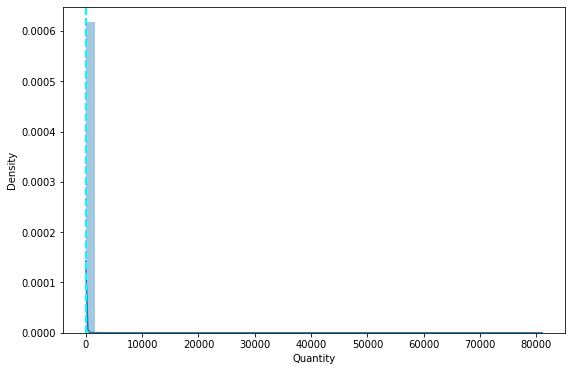

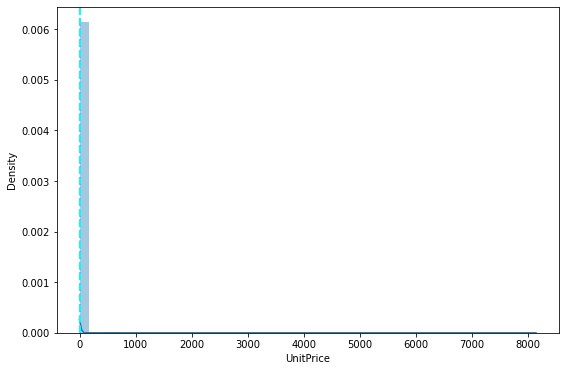

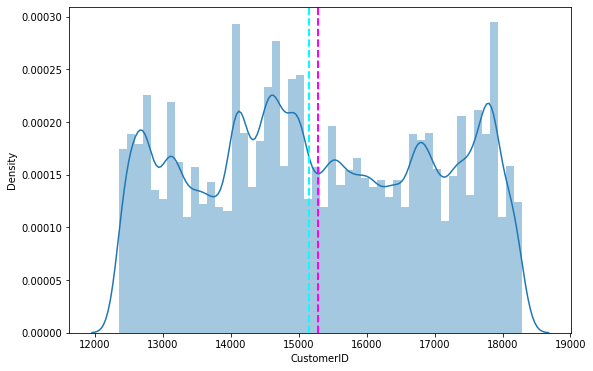

In [ ]:
# Analysing distribution of all numerical variables
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df2[col]
    sns.distplot(x=df2[col])
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    plt.xlabel(col)
plt.show()

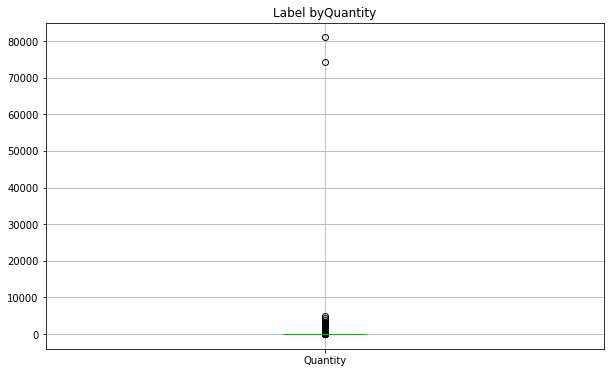

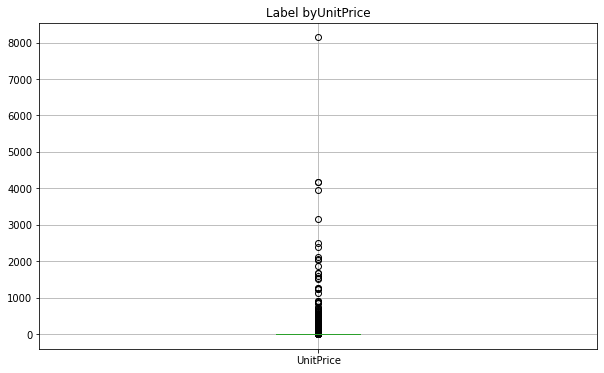

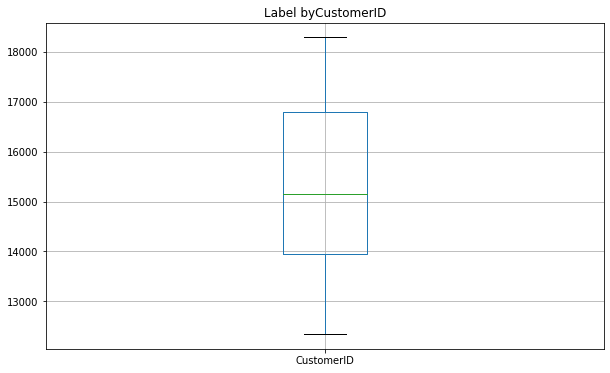

In [ ]:
# Plot the box plot for each numerical feature
for col in numerical_features:
  fig = plt.figure(figsize=(10,6))
  ax = fig.gca()
  df2.boxplot(col)
  ax.set_title("Label by" + col)
plt.show()

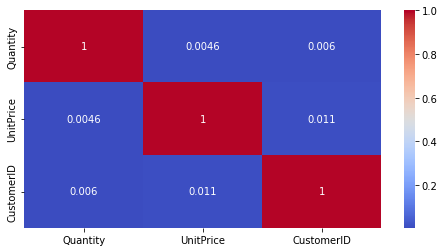

In [ ]:
# Heatmap to show correlation of different variables
plt.figure(figsize=(8,4))
correlation = df2.corr()
sns.heatmap(abs(correlation), annot = True, cmap = "coolwarm")

**Checking Total Sale with respect to country**

In [ ]:
# Creating new column called total sale 
df2["Total_sales"] = df2["UnitPrice"]*df2["Quantity"]

In [ ]:
# Grouping total_sale by country and finding total revenue in %
country_df2 = df2.groupby("Country")["Total_sales"].sum().reset_index()
country_df2["Total_sales%"] = round(country_df2["Total_sales"]*100/country_df2["Total_sales"].sum(),2)


In [ ]:
df2.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.3


In [ ]:
country_df2.head(1)

,Country,Total_sales,Total_sales%
0,Australia,138453.81,1.56


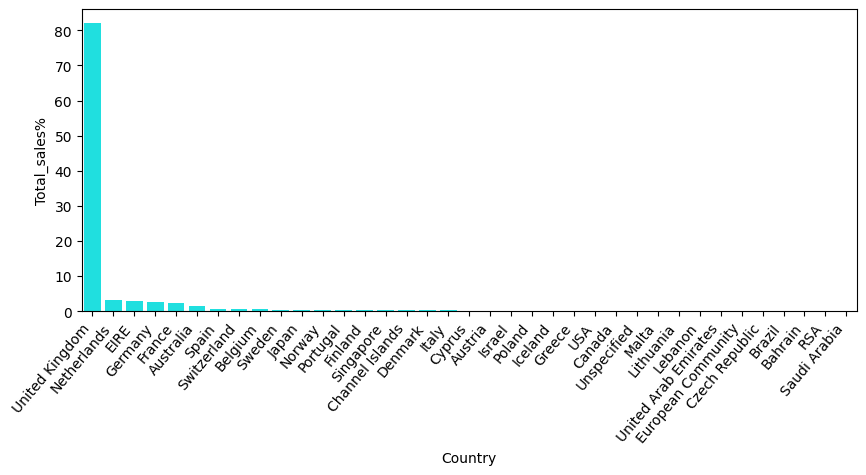

In [ ]:
# ploting country wise distribution
country_df2 = country_df2.sort_values(by = "Total_sales%", ascending = False)
fig, ax = plt.subplots(figsize=(10,4),dpi=100)
ax=sns.barplot(x=country_df2["Country"], y=country_df2['Total_sales%'],color='cyan')
ax.set_xticklabels(ax.get_xticklabels(), rotation=50, ha="right")
plt.show() 

The maximum money is spent by the residents of UK.


In [ ]:
# Top 5 items sold in UK
uk_product = df2.groupby(['StockCode','Description'],as_index= False)['Quantity'].sum().sort_values(by='Quantity', \
                                                                                                      ascending=False)
uk_product.head()

,StockCode,Description,Quantity
2602,23843,"PAPER CRAFT , LITTLE BIRDIE",80995
2100,23166,MEDIUM CERAMIC TOP STORAGE JAR,77916
3020,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54319
3444,85099B,JUMBO BAG RED RETROSPOT,46078
3459,85123A,WHITE HANGING HEART T-LIGHT HOLDER,36706


In [ ]:
df3= df2.copy()
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60


In [ ]:
# Create a new feature day from Invoicedate
df3['Day'] = df3['InvoiceDate'].dt.day_name()

In [ ]:
# Create a variable and count the day name
day_df = df3['Day'].value_counts().reset_index()
day_df.rename(columns = {'index':'Day_Name','Day':'Count'}, inplace= True)
day_df

,Day_Name,Count
0,Thursday,70691
1,Tuesday,66153
2,Sunday,60074
3,Monday,59663
4,Wednesday,57058
5,Friday,56316
6,Saturday,22737


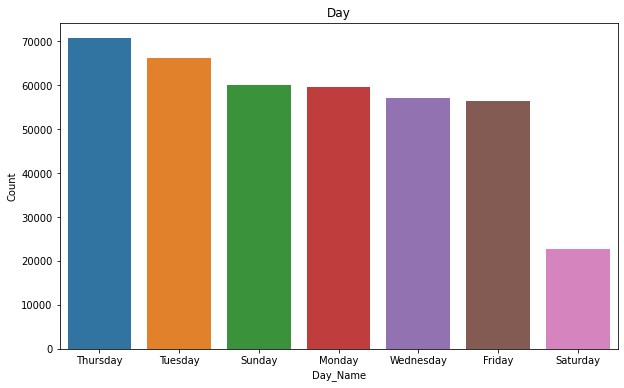

In [ ]:
# Plot the number of shopping as per days
plt.figure(figsize=(10,6))
plt.title('Day')
sns.barplot(x= 'Day_Name', y='Count',data=day_df)

Maximum sale is made on Thursday.

In [ ]:
df3['Month'] = df3['InvoiceDate'].dt.month
df3

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales,Day,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30,Tuesday,1
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,Tuesday,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00,Tuesday,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,Tuesday,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680.0,France,10.20,Monday,9
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680.0,France,12.60,Monday,9
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,Monday,9
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680.0,France,16.60,Monday,9


In [ ]:
# Number of customers shoppping per month
month_df = df3['Month'].value_counts().reset_index()
month_df.rename(columns = {'index':'Month_Name','Month':'Count'},inplace = True)
month_df.head()

,Month_Name,Count
0,11,53709
1,10,43825
2,9,39261
3,6,34077
4,7,33039


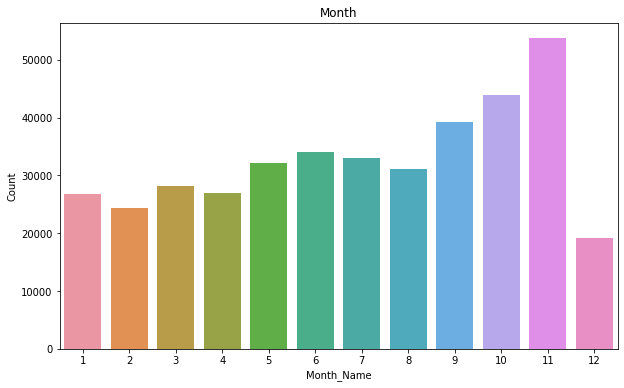

In [ ]:
# Plot the result
plt.figure(figsize=(10,6))
plt.title('Month')
sns.barplot(x='Month_Name', y='Count', data=month_df)

Maximum sale is made in the month of November.

# **Creating Recency, Frequency and Monetary(RFM) Model**

# Recency


In [ ]:
# Setting reference date
import datetime

reference_date= df3.InvoiceDate.max()
reference_date=reference_date+datetime.timedelta(days=1)
print('The reference date is', reference_date)

The reference date is 2011-12-11 17:19:00


In [ ]:
df3['days_since_last_purchase']=reference_date-df3.InvoiceDate

In [ ]:
#changing Data type of Days_since_last_purchace column to float
df3['days_since_last_purchase_float']=df3['days_since_last_purchase'].astype('timedelta64[D]')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column                          Non-Null Count   Dtype          
---  ------                          --------------   -----          
 0   InvoiceNo                       392692 non-null  object         
 1   StockCode                       392692 non-null  object         
 2   Description                     392692 non-null  object         
 3   Quantity                        392692 non-null  int64          
 4   InvoiceDate                     392692 non-null  datetime64[ns] 
 5   UnitPrice                       392692 non-null  float64        
 6   CustomerID                      392692 non-null  float64        
 7   Country                         392692 non-null  object         
 8   Total_sales                     392692 non-null  float64        
 9   Day                             392692 non-null  object         
 10  Month                           392692 non-n

In [ ]:
# Creating Recency DF
recency_df=df3.groupby('CustomerID').min().reset_index()[['CustomerID','days_since_last_purchase_float']]
recency_df.rename(columns={'days_since_last_purchase_float':'Recency'}, inplace=True)

In [ ]:
recency_df.head(2)

,CustomerID,Recency
0,12346.0,327.0
1,12347.0,41.0


In [ ]:
recency_df.shape

(4338, 2)

In [ ]:
recency_df.describe()

,CustomerID,Recency
count,4338.000000,4338.000000
mean,15300.408022,106.470954
std,1721.808492,115.082161
min,12346.000000,1.000000
25%,13813.250000,23.000000
50%,15299.500000,62.000000
75%,16778.750000,162.750000
max,18287.000000,698.000000


In [ ]:
# Create a list in a range of 10-20
My_list = [*range(0,801, 20)]
  
# Print the list
print(My_list)

[0, 20, 40, 60, 80, 100, 120, 140, 160, 180, 200, 220, 240, 260, 280, 300, 320, 340, 360, 380, 400, 420, 440, 460, 480, 500, 520, 540, 560, 580, 600, 620, 640, 660, 680, 700, 720, 740, 760, 780, 800]


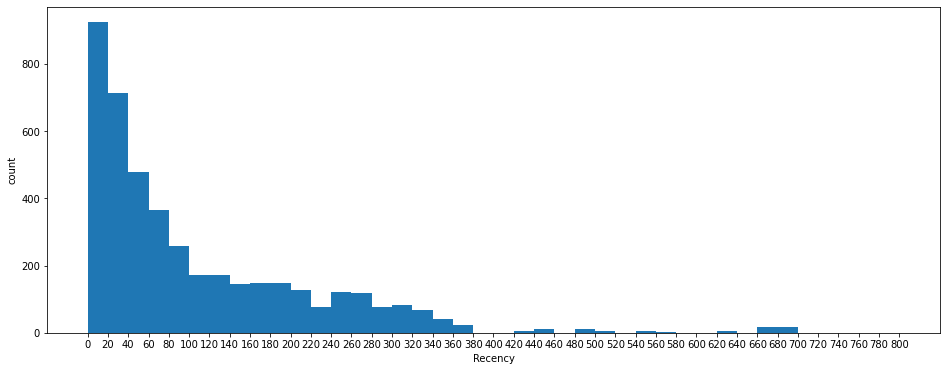

In [ ]:
# Ploting 
fig = plt.figure(figsize=(16,6))
n, bins, patches = plt.hist(recency_df.Recency, bins=My_list)
plt.xticks(bins)
plt.xlabel('Recency')
plt.ylabel("count")
plt.show()

#**Frequency**

In [ ]:
df3.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_sales,Day,Month,days_since_last_purchase,days_since_last_purchase_float
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.3,Tuesday,1,698 days 08:53:00,698.0


In [ ]:
print(len(df.InvoiceNo.unique()))
print(len(df.CustomerID.unique()))

19960
4339


In [ ]:
# creating Freq_df
freq_df=df3[['CustomerID','InvoiceNo']].groupby('CustomerID').count().reset_index()
freq_df.rename(columns={'InvoiceNo':'Frequency'},inplace=True)

In [ ]:
freq_df

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
...,...,...
4333,18280.0,10
4334,18281.0,7
4335,18282.0,12
4336,18283.0,721


In [ ]:
freq_df.describe()

,CustomerID,Frequency
count,4338.000000,4338.000000
mean,15300.408022,90.523744
std,1721.808492,225.506968
min,12346.000000,1.000000
25%,13813.250000,17.000000
50%,15299.500000,41.000000
75%,16778.750000,98.000000
max,18287.000000,7676.000000


In [ ]:
freq_df.Frequency.quantile(0.9) 

202.30000000000018

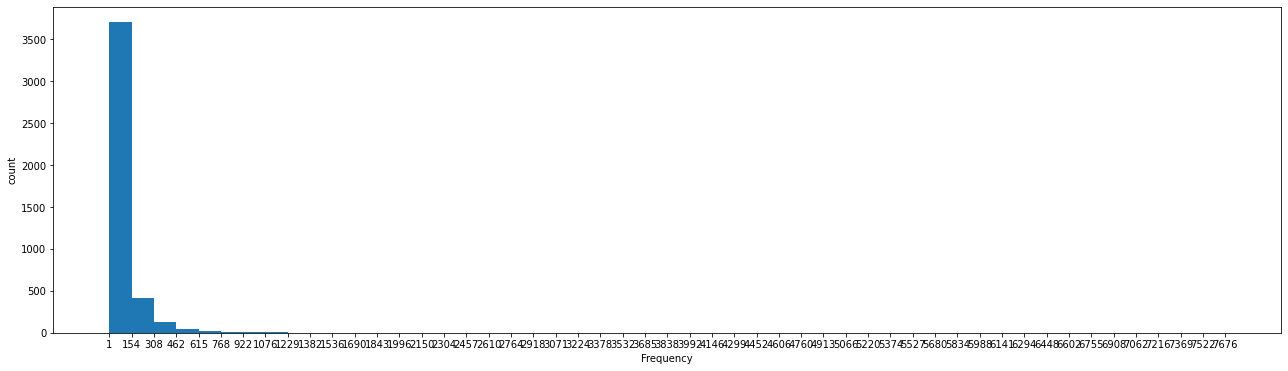

In [ ]:
# Ploting Frequency
fig = plt.figure(figsize=(22,6))
n, bins, patches = plt.hist(freq_df.Frequency, bins=50)
plt.xticks(bins)
plt.xlabel('Frequency')
plt.ylabel("count")
plt.show()

#**Monetory** 

In [ ]:
#calculating Monetary
monetary_df=df3.groupby("CustomerID")["Total_sales"].sum().reset_index()[['CustomerID', 'Total_sales']]
monetary_df.rename(columns={'Total_sales': 'Monetary'},inplace=True)
monetary_df.head(2)

,CustomerID,Monetary
0,12346.0,77183.6
1,12347.0,4310.0


In [ ]:
monetary_df.describe()

,CustomerID,Monetary
count,4338.000000,4338.000000
mean,15300.408022,2048.688081
std,1721.808492,8985.230220
min,12346.000000,3.750000
25%,13813.250000,306.482500
50%,15299.500000,668.570000
75%,16778.750000,1660.597500
max,18287.000000,280206.020000


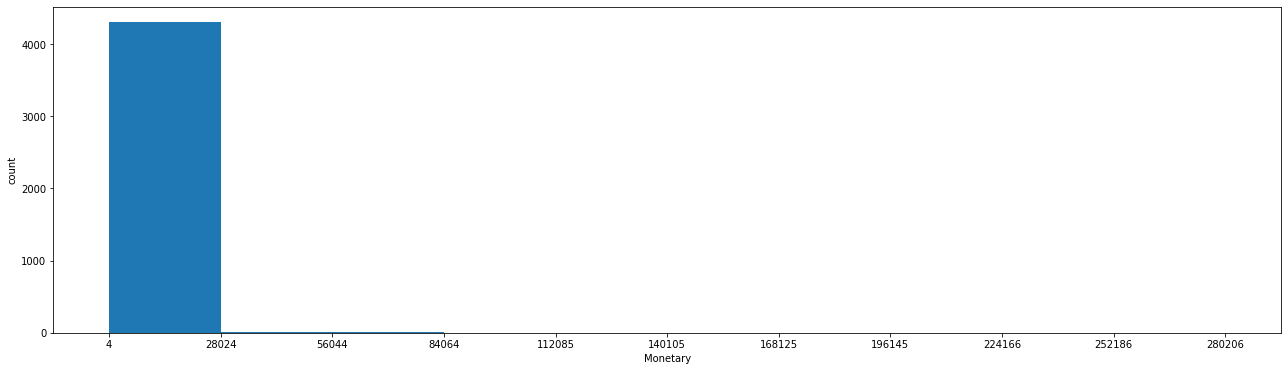

In [ ]:
# Ploting Monetary
fig = plt.figure(figsize=(22,6))
n, bins, patches = plt.hist(monetary_df.Monetary, bins=10)
plt.xticks(bins)
plt.xlabel('Monetary')
plt.ylabel("count")
plt.show()

**Combining all Three Recency, Frequency, Monetary Df** 

In [ ]:
#Combining all three columns
rfm_df=recency_df.merge(freq_df,how='outer')
rfm_df=rfm_df.merge(monetary_df,how='outer')

In [ ]:
rfm_df.shape

(4338, 4)

In [ ]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,327.0,1,77183.60
1,12347.0,41.0,182,4310.00
2,12348.0,77.0,31,1797.24
3,12349.0,20.0,73,1757.55
4,12350.0,312.0,17,334.40


# **Distribution of the R,F,M features**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


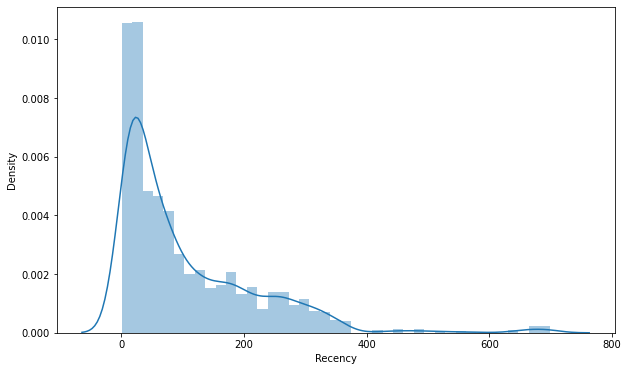

In [ ]:
# Recency Distribution Plot
x = rfm_df['Recency']
plt.figure(figsize=(10,6))
sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


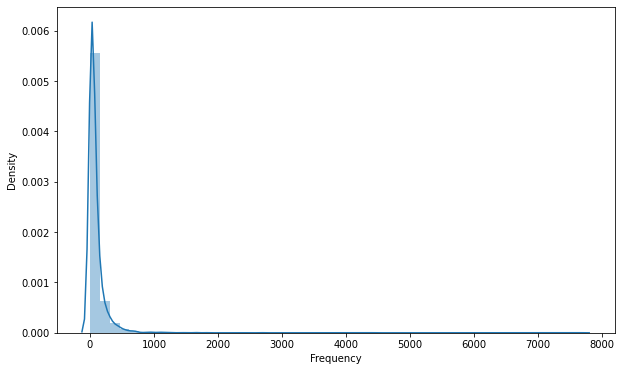

In [ ]:
# Desriptive Statistics (Frequency)
x = rfm_df['Frequency']
plt.figure(figsize=(10,6))
sns.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


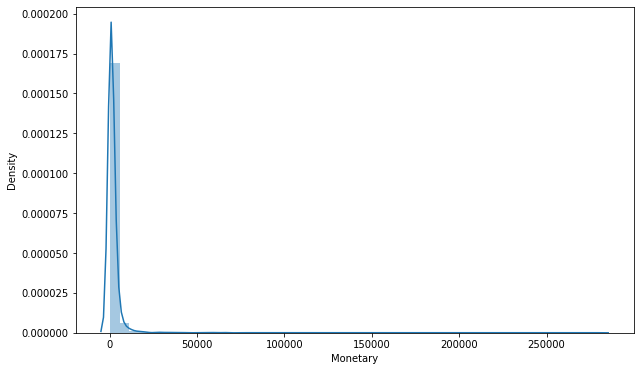

In [ ]:
# Descriptive Staistics (Monetary)
x = rfm_df['Monetary']
plt.figure(figsize=(10,6))
sns.distplot(x)

# **Applying Log Transformation and Scaling Features**

In [ ]:
from sklearn import preprocessing
import math
rfm_df['Recency_log'] = rfm_df['Recency'].apply(math.log)
rfm_df['Frequency_log'] = rfm_df['Frequency'].apply(math.log)
rfm_df['Monetary_log'] = rfm_df['Monetary'].apply(math.log)

feature_vector=['Recency_log','Frequency_log','Monetary_log']

X=rfm_df[feature_vector].values
scaler=preprocessing.StandardScaler()
rfm_df_scaled=pd.DataFrame(scaler.fit_transform(X))

In [ ]:
rfm_df_scaled.head()

,0,1,2
0,1.345224,-2.779978,3.700201
1,-0.213667,1.160356,1.413256
2,0.259494,-0.179855,0.719951
3,-0.752600,0.468643,0.702251
4,1.309970,-0.634745,-0.612996


In [ ]:
rfm_df_scaled.describe()

,0,1,2
count,4.338000e+03,4.338000e+03,4.338000e+03
mean,2.145715e-16,2.129335e-16,5.241440e-17
std,1.000115e+00,1.000115e+00,1.000115e+00
min,-3.001707e+00,-2.779978e+00,-4.172381e+00
25%,-6.476706e-01,-6.347448e-01,-6.820955e-01
50%,9.682346e-02,3.183903e-02,-6.385708e-02
75%,8.213750e-01,6.916361e-01,6.572740e-01
max,1.914502e+00,3.993582e+00,4.722173e+00


In [ ]:
# Changing Column name of Scaled Data
rfm_df_scaled.rename(columns={0:'Recency',1:'Frequency',2:'Monetary'},inplace=True)
rfm_df_scaled.head()

,Recency,Frequency,Monetary
0,1.345224,-2.779978,3.700201
1,-0.213667,1.160356,1.413256
2,0.259494,-0.179855,0.719951
3,-0.752600,0.468643,0.702251
4,1.309970,-0.634745,-0.612996


In [ ]:
rfm_df_customer_id=pd.DataFrame(rfm_df['CustomerID'])
rfm_df_customer_id.head()

,CustomerID
0,12346.0
1,12347.0
2,12348.0
3,12349.0
4,12350.0


In [ ]:
# Joining Customer ID to Scaled Data
rfm_df_scaled_2=pd.concat([rfm_df_customer_id,rfm_df_scaled],axis=1)

In [ ]:
rfm_df_scaled_2.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,1.345224,-2.779978,3.700201
1,12347.0,-0.213667,1.160356,1.413256
2,12348.0,0.259494,-0.179855,0.719951
3,12349.0,-0.752600,0.468643,0.702251
4,12350.0,1.309970,-0.634745,-0.612996


#**Scatter Plot of All Combinations**

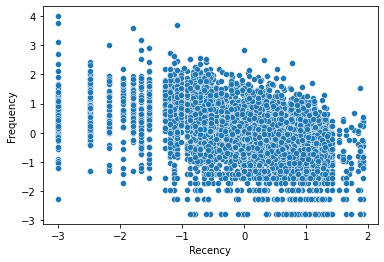

In [ ]:
# Scatterplot of Recency vs Frequency
sns.scatterplot(data=rfm_df_scaled_2, x="Recency", y="Frequency")

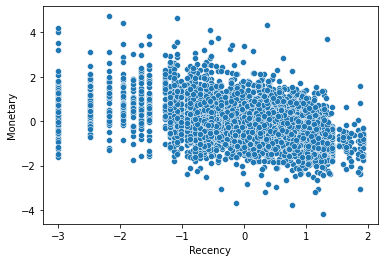

In [ ]:
# Scatter Plot of Recency vs Monetary
sns.scatterplot(data=rfm_df_scaled_2, x="Recency", y="Monetary")

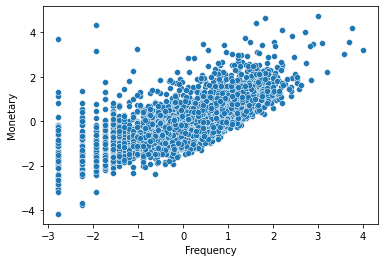

In [ ]:
# Scatter Plot of Frequency vs Monetary
sns.scatterplot(data=rfm_df_scaled_2, x="Frequency", y="Monetary")

**3D plot for RFM**

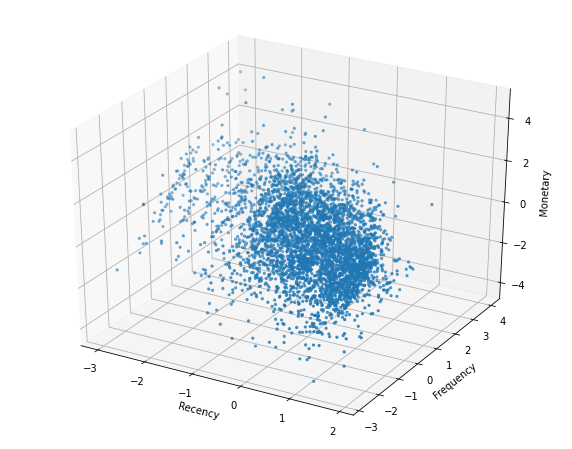

In [ ]:
# 3D plotting for all three variables
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(figsize=(10,8))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_df_scaled_2.Recency
ys=rfm_df_scaled_2.Frequency
zs=rfm_df_scaled_2.Monetary
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.show()

# **Applying  K-Means Clustering Model**


In [ ]:
RFM_df= rfm_df_scaled_2.drop(['CustomerID'],axis=1)
RFM_df.head(1)

,Recency,Frequency,Monetary
0,1.345224,-2.779978,3.700201


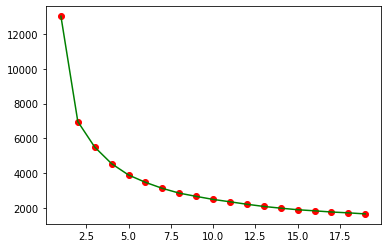

In [ ]:
# Cheking K value using Elbow Method
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
cluster=[]
for k in range(1,20):
  km=KMeans(n_clusters=k)
  km.fit(RFM_df)
  cluster.append(km.inertia_)
plt.plot(np.arange(1,20), cluster,color="green")
plt.scatter(np.arange(1,20), cluster,color="red")
plt.show()



From this we can say K value of 5 is good

For n_clusters = 2 The average silhouette_score is : 0.39479043935493124
For n_clusters = 3 The average silhouette_score is : 0.2917782923238456
For n_clusters = 4 The average silhouette_score is : 0.2978489324304362
For n_clusters = 5 The average silhouette_score is : 0.27432786633550404
For n_clusters = 6 The average silhouette_score is : 0.2817942284396916
For n_clusters = 7 The average silhouette_score is : 0.2695053683252854
For n_clusters = 8 The average silhouette_score is : 0.2661903239890505


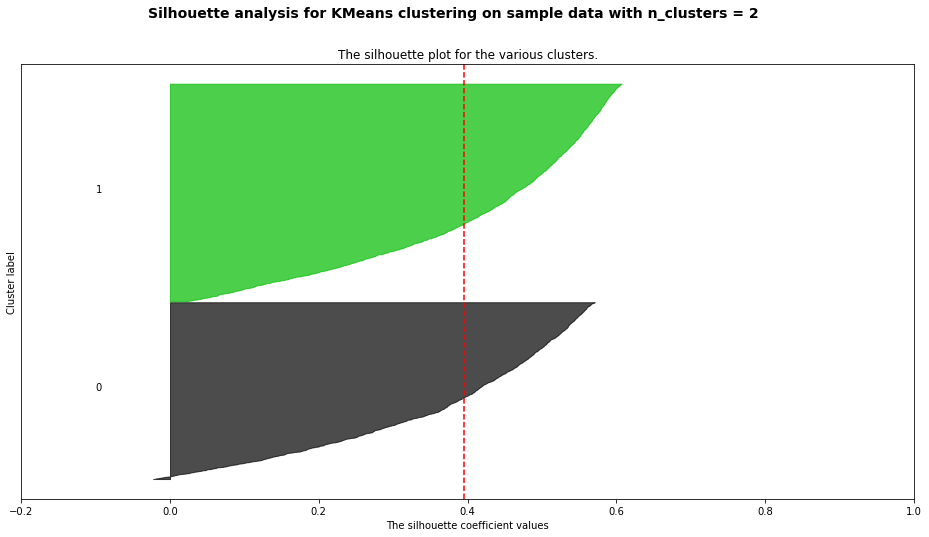

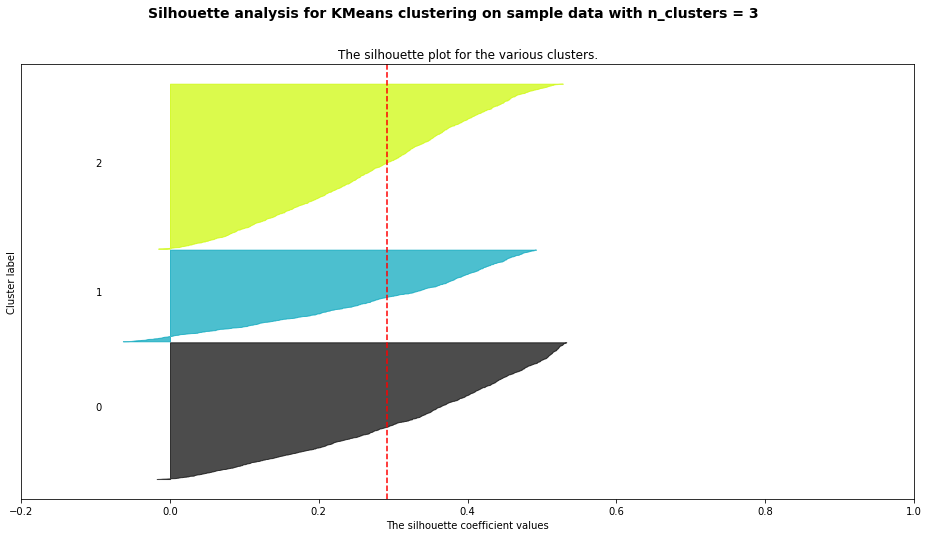

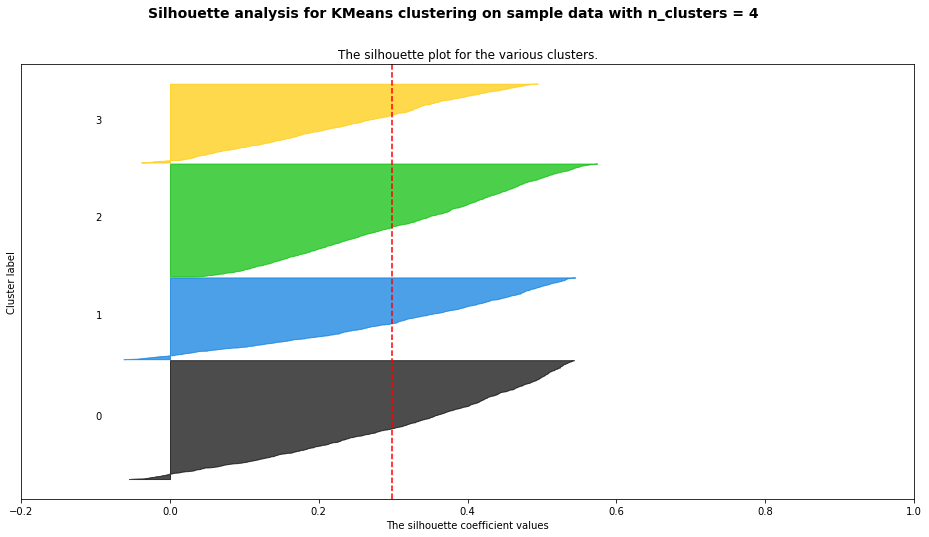

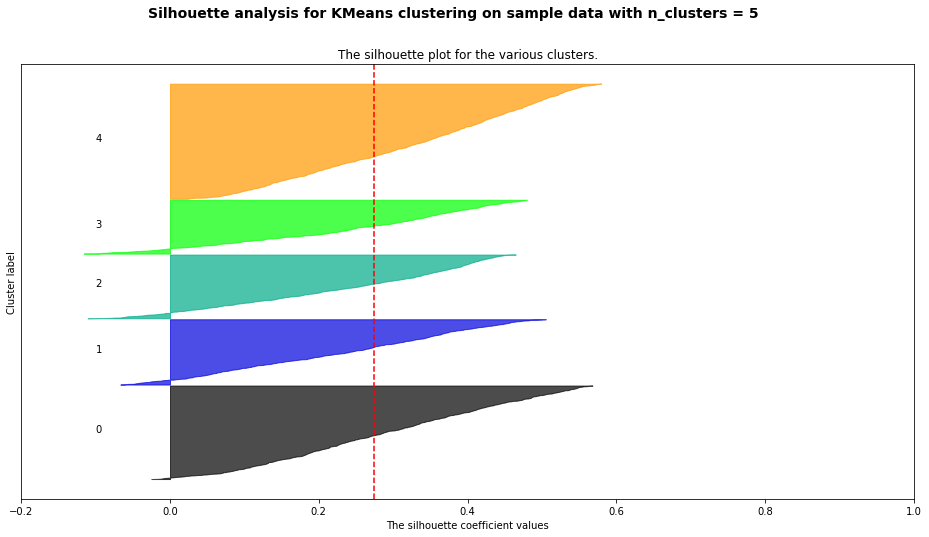

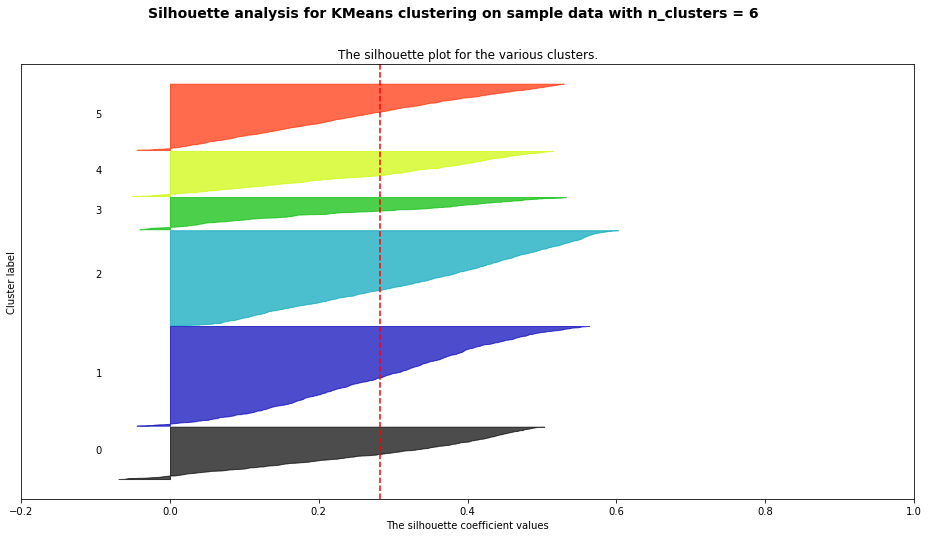

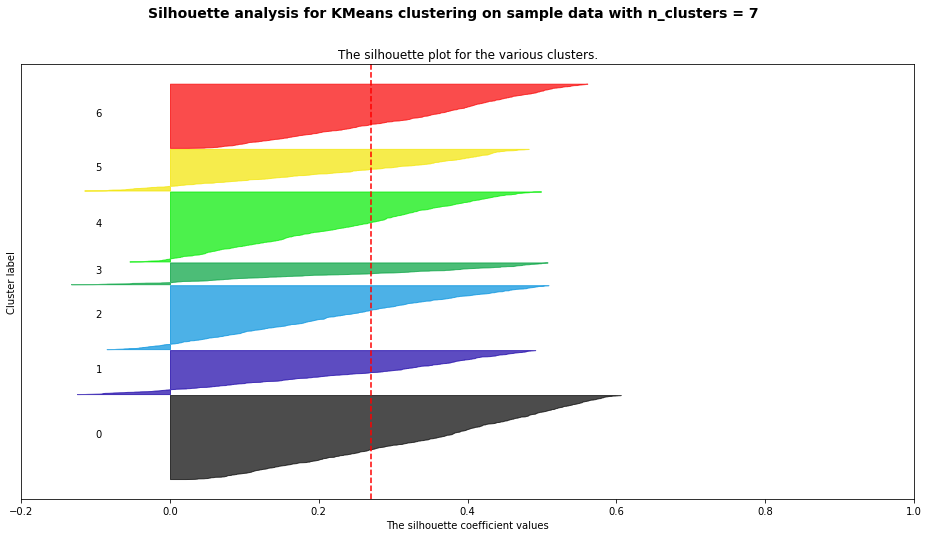

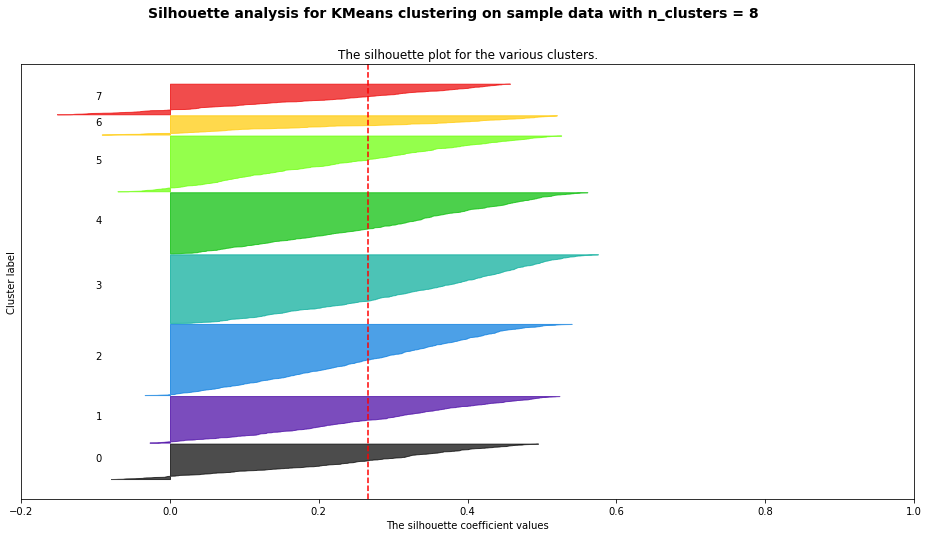

In [ ]:
# make a list of clusters to check
clusters_list = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in clusters_list:
    # Initialize the clusterer with n_clusters value and a random generator
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(RFM_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(RFM_df, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(RFM_df, cluster_labels)

    fig, axis = plt.subplots(figsize=(16,8))
    
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        cluster_silhouette_values.sort()
        size_cluster_i = cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        axis.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axis.text(-0.1, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    axis.set_title("The silhouette plot for the various clusters.")
    axis.set_xlabel("The silhouette coefficient values")
    axis.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    axis.axvline(x=silhouette_avg, color="red", linestyle="--")

    axis.set_yticks([])  # Clear the yaxis labels / ticks
    axis.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
   
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),fontsize=14, fontweight='bold')

**Applying K-means using clusters=4**

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=1)
cluster_labels = clusterer.fit_predict(RFM_df)

In [ ]:
cluster_labels

array([2, 1, 2, ..., 0, 1, 1], dtype=int32)

Text(0.5, 0.92, 'Data Visualization')

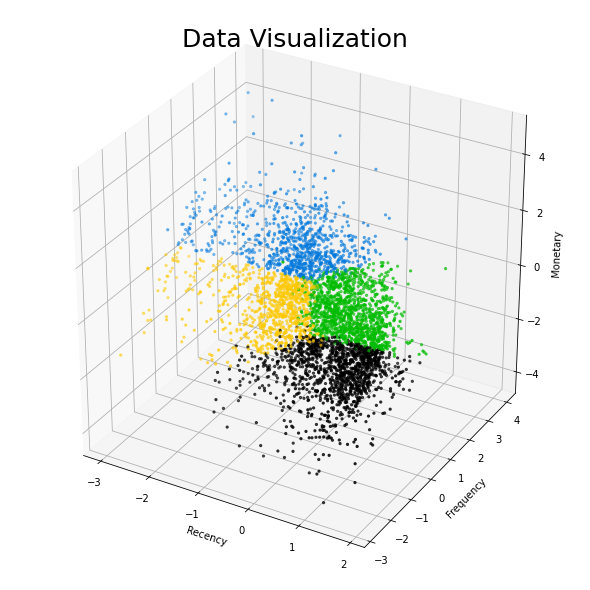

In [ ]:
# plot data points in 3D space
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = RFM_df['Recency']
y = RFM_df['Frequency']
z = RFM_df['Monetary']
colors = cm.nipy_spectral(cluster_labels.astype(float) / 4)
ax.scatter(x, y, z, c=colors, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("Data Visualization", size=25)

In [ ]:
# add cluster label to each data point
rfm_df_scaled_2['Cluster'] = cluster_labels
rfm_df_scaled_2.head()

,CustomerID,Recency,Frequency,Monetary,Cluster
0,12346.0,1.345224,-2.779978,3.700201,2
1,12347.0,-0.213667,1.160356,1.413256,1
2,12348.0,0.259494,-0.179855,0.719951,2
3,12349.0,-0.752600,0.468643,0.702251,1
4,12350.0,1.309970,-0.634745,-0.612996,0


**Applying K-means using clusters=5**

In [ ]:
clusterer1 = KMeans(n_clusters=5, random_state=1)
cluster_labels1 = clusterer1.fit_predict(RFM_df)

Text(0.5, 0.92, 'Data Visualization')

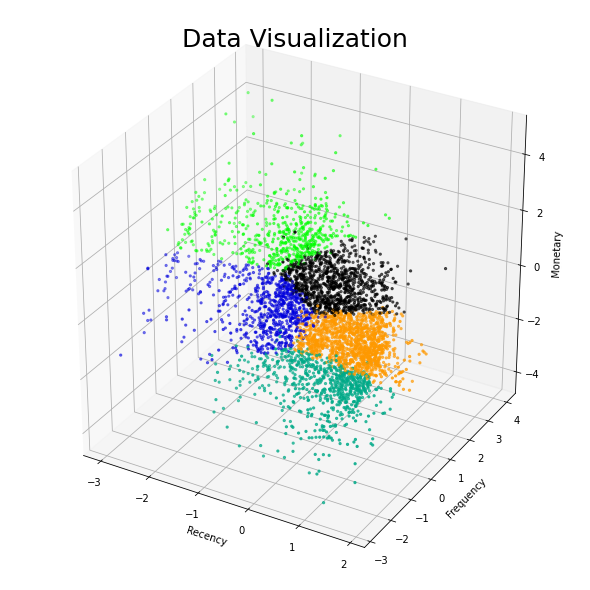

In [ ]:
# plot data points in 3D space
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
x = RFM_df['Recency']
y = RFM_df['Frequency']
z = RFM_df['Monetary']
colors = cm.nipy_spectral(cluster_labels1.astype(float) / 5)
ax.scatter(x, y, z, c=colors, marker='.')
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title("Data Visualization", size=25)

# **Pie Chart to see Type of Customers**

In [ ]:
# Making a copy of rfm_df
rfmnew= rfm_df.copy()
rfmnew

,CustomerID,Recency,Frequency,Monetary,Recency_log,Frequency_log,Monetary_log
0,12346.0,327.0,1,77183.60,5.789960,0.000000,11.253942
1,12347.0,41.0,182,4310.00,3.713572,5.204007,8.368693
2,12348.0,77.0,31,1797.24,4.343805,3.433987,7.494007
3,12349.0,20.0,73,1757.55,2.995732,4.290459,7.471676
4,12350.0,312.0,17,334.40,5.743003,2.833213,5.812338
...,...,...,...,...,...,...,...
4333,18280.0,161.0,10,180.60,5.081404,2.302585,5.196285
4334,18281.0,5.0,7,80.82,1.609438,1.945910,4.392224
4335,18282.0,217.0,12,178.05,5.379897,2.484907,5.182064
4336,18283.0,11.0,721,2045.53,2.397895,6.580639,7.623412


In [ ]:
# Dropping the columns
rfmnew.drop(['Recency','Frequency','Monetary','CustomerID'],axis=1,inplace=True)
rfmnew

,Recency_log,Frequency_log,Monetary_log
0,5.789960,0.000000,11.253942
1,3.713572,5.204007,8.368693
2,4.343805,3.433987,7.494007
3,2.995732,4.290459,7.471676
4,5.743003,2.833213,5.812338
...,...,...,...
4333,5.081404,2.302585,5.196285
4334,1.609438,1.945910,4.392224
4335,5.379897,2.484907,5.182064
4336,2.397895,6.580639,7.623412


**Plotting the pi-chart for clusters=4**

In [ ]:
# Creating column name Cluster ID
model = KMeans(n_clusters=4, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
ClusterID = model.fit_predict(rfmnew)
ClusterID

rfm_clusters=rfmnew.copy()
rfm_clusters["ClusterID"] = ClusterID

rfm_clusters.head()

,Recency_log,Frequency_log,Monetary_log,ClusterID
0,5.789960,0.000000,11.253942,2
1,3.713572,5.204007,8.368693,1
2,4.343805,3.433987,7.494007,2
3,2.995732,4.290459,7.471676,1
4,5.743003,2.833213,5.812338,0


In [ ]:
# Concating the 'CustomerID'
rfm_clusters1=pd.concat([rfm_df_customer_id,rfm_clusters],axis=1)
rfm_clusters1.head()

,CustomerID,Recency_log,Frequency_log,Monetary_log,ClusterID
0,12346.0,5.789960,0.000000,11.253942,2
1,12347.0,3.713572,5.204007,8.368693,1
2,12348.0,4.343805,3.433987,7.494007,2
3,12349.0,2.995732,4.290459,7.471676,1
4,12350.0,5.743003,2.833213,5.812338,0


In [ ]:
customer_percent_in_cluster4=rfm_clusters1["ClusterID"].value_counts().sort_values(ascending = False)

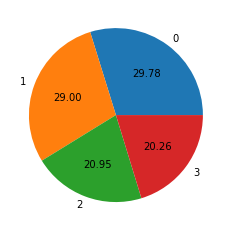

In [ ]:
#Now we are plotting pie-chart to show customer precentage in the 4 clusters
plt.figure()

plt.pie(customer_percent_in_cluster4, labels=[0,1,2,3], autopct='%.2f')
plt.show()

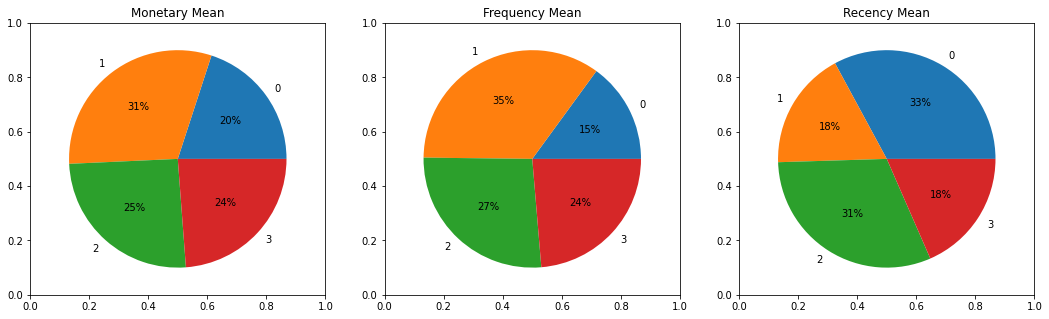

In [ ]:
#Now we are plotting pie-chart using means of different clusters
fig,axis = plt.subplots(1,3, figsize =(18,5))


ax1 =fig.add_subplot(1,3,1)


plt.title("Monetary Mean")

km_cluster_sale =rfm_clusters1.groupby("ClusterID").Monetary_log.mean()
km_cluster_sale
km_cluster_Recency =rfm_clusters1.groupby("ClusterID").Recency_log.mean()
km_cluster_Frequence =rfm_clusters1.groupby("ClusterID").Frequency_log.mean()

ax1.pie(km_cluster_sale, labels =[0,1,2,3],autopct='%.0f%%')

ax1 =fig.add_subplot(1,3,2)
plt.title("Frequency Mean")
ax1.pie(km_cluster_Frequence, labels =[0,1,2,3],autopct='%.0f%%')


ax1 =fig.add_subplot(1,3,3)
plt.title("Recency Mean")
ax1.pie(km_cluster_Recency, labels =[0,1,2,3],autopct='%.0f%%')




# ax1.axis("off")


plt.show()

**Plotting the pi-chart for clusters=5**

In [ ]:
# Creating column name Cluster ID
model = KMeans(n_clusters=5, init ='k-means++', max_iter=300, n_init=10,random_state=0 )
ClusterID_1 = model.fit_predict(rfmnew)
ClusterID_1

rfm_clusters_1=rfmnew.copy()
rfm_clusters_1["ClusterID"] = ClusterID_1

rfm_clusters_1.head()

,Recency_log,Frequency_log,Monetary_log,ClusterID
0,5.789960,0.000000,11.253942,3
1,3.713572,5.204007,8.368693,2
2,4.343805,3.433987,7.494007,2
3,2.995732,4.290459,7.471676,2
4,5.743003,2.833213,5.812338,3


In [ ]:
# Concating the 'CustomerID'
rfm_clusters_2=pd.concat([rfm_df_customer_id,rfm_clusters_1],axis=1)
rfm_clusters_2.head()

,CustomerID,Recency_log,Frequency_log,Monetary_log,ClusterID
0,12346.0,5.789960,0.000000,11.253942,3
1,12347.0,3.713572,5.204007,8.368693,2
2,12348.0,4.343805,3.433987,7.494007,2
3,12349.0,2.995732,4.290459,7.471676,2
4,12350.0,5.743003,2.833213,5.812338,3


In [ ]:
customer_percent_in_cluster5=rfm_clusters_2["ClusterID"].value_counts().sort_values(ascending = False)

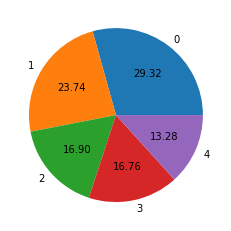

In [ ]:
#Now we are plotting pie-chart to show customer precentage in the 5 clusters
plt.figure()

plt.pie(customer_percent_in_cluster5, labels=[0,1,2,3,4], autopct='%.2f')
plt.show()

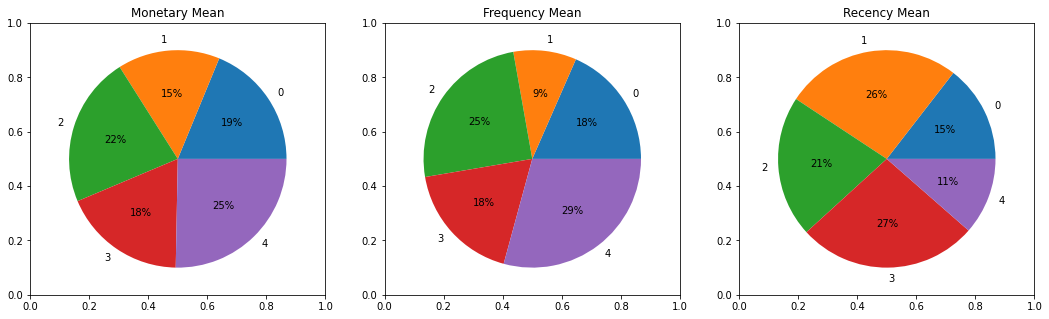

In [ ]:
#Now we are plotting pie-chart using means of different clusters
fig,axis = plt.subplots(1,3, figsize =(18,5))


ax1 =fig.add_subplot(1,3,1)


plt.title("Monetary Mean")

km_cluster_sale1 =rfm_clusters_2.groupby("ClusterID").Monetary_log.mean()
km_cluster_sale1
km_cluster_Recency1 =rfm_clusters_2.groupby("ClusterID").Recency_log.mean()
km_cluster_Frequence1 =rfm_clusters_2.groupby("ClusterID").Frequency_log.mean()

ax1.pie(km_cluster_sale1, labels =[0,1,2,3,4],autopct='%.0f%%')

ax1 =fig.add_subplot(1,3,2)
plt.title("Frequency Mean")
ax1.pie(km_cluster_Frequence1, labels =[0,1,2,3,4],autopct='%.0f%%')


ax1 =fig.add_subplot(1,3,3)
plt.title("Recency Mean")
ax1.pie(km_cluster_Recency1, labels =[0,1,2,3,4],autopct='%.0f%%')




# ax1.axis("off")


plt.show()

#**Conclusion**

1.	Most purchases are from UK around 80%
2.	Maximum amount of the money is spent by the customers of United Kingdom.
3.	The maximum number of transactions has been made in the month of november. 
4.	The maximum number of transaction have occurred on Thursday.
5.	The best number of clusters found is 5 by using Elbow Method
6.	Cluster 0 include customers with medium expenditure, relatively less frequent and the people who made the last transaction a while ago.
7.	Cluster 1 include customers with highest expenditure, most frequent and the customers who transacted recently.
8.	Cluster 2 include customers with high expenditure, highly frequent but they made the last transaction long ago.
9.	Cluster 3 include customers with medium expenditure, relatively less frequent and the people who made the last transaction long ago.
10.	Cluster 4 include customers with least expenditure, least frequent and the people who made the last transaction long ago.
